# Application Project Milestone 2

## 4. Performance Comparison

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import ttest_rel
from sklearn.model_selection import KFold, cross_val_score 

In [2]:
# # Load the model
# loaded_ridge = joblib.load("models/best_ridge_model.pkl")
# loaded_rf = joblib.load("models/best_rf_model.pkl")
# loaded_mlp = joblib.load("models/best_mlp_model.pkl")

# # Show the parameters of the model
# print("Ridge parameters:")
# print(loaded_ridge)
# print("Random Forest parameters:")
# print(loaded_rf)
# print("MLP parameters:")
# print(loaded_mlp)

In [3]:
# Load the data
X_train_raw = pd.read_csv('./Raw_features/X_train.csv')
y_train_raw = pd.read_csv('Raw_features/y_train.csv')
X_test_raw  = pd.read_csv('Raw_features/X_test.csv')
y_test_raw  = pd.read_csv('Raw_features/y_test.csv')

X_train_handle = pd.read_csv('Handle_selected_features/X_train.csv')
y_train_handle = pd.read_csv('Handle_selected_features/Y_train.csv')
X_test_handle  = pd.read_csv('Handle_selected_features/X_test.csv')
y_test_handle  = pd.read_csv('Handle_selected_features/Y_test.csv')

X_train_cluster = pd.read_csv('Cluster_based_features/X_cluster_train.csv')
y_train_cluster = pd.read_csv('Cluster_based_features/Y_cluster_train.csv')
X_test_cluster  = pd.read_csv('Cluster_based_features/X_cluster_test.csv')
y_test_cluster  = pd.read_csv('Cluster_based_features/Y_cluster_test.csv')

X_train_pca_2 = pd.read_csv('PCA_transformed_features/X_train_pca.csv')
y_train_pca_2 = pd.read_csv('PCA_transformed_features/y_train_pca.csv')
X_test_pca_2  = pd.read_csv('PCA_transformed_features/X_test_pca.csv')
y_test_pca_2  = pd.read_csv('PCA_transformed_features/y_test_pca.csv')

X_train_pca_opt = pd.read_csv('PCA_transformed_features/X_train_pca_opt.csv')
y_train_pca_opt = pd.read_csv('PCA_transformed_features/y_train_pca_opt.csv')
X_test_pca_opt  = pd.read_csv('PCA_transformed_features/X_test_pca_opt.csv')
y_test_pca_opt  = pd.read_csv('PCA_transformed_features/y_test_pca_opt.csv')

### 4.1 Cross Validation

In [ ]:
# Define a Helper Function to Run 10-Fold CV and Return MSE & R^2

model = MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                             activation='relu',
                             solver='adam',
                             max_iter=1000,
                             random_state=0)

def run_cv_and_get_metrics(X_train, y_train, X_test, y_test):
    """
    Returns two arrays of length kf.n_splits:
      - fold_mses:  the MSE for each fold
      - fold_r2s:   the R^2 for each fold
    """
    model.fit(X_train, y_train.ravel())

    val_score = cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

    score_r2 = model.score(X_test, y_test)
        
    return -val_score.mean(), score_r2

In [ ]:
# Run CV for Each Feature Set and Gather MSE & R^2
raw_mses,     raw_r2s     = run_cv_and_get_metrics(X_train_raw.values, y_train_raw.values.ravel(), X_test_raw.values, y_test_raw.values.ravel(),)
handle_mses,  handle_r2s  = run_cv_and_get_metrics(X_train_handle.values, y_train_handle.values.ravel(), X_test_handle.values, y_test_handle.values.ravel())
cluster_mses, cluster_r2s = run_cv_and_get_metrics(X_train_cluster.values, y_train_cluster.values.ravel(), X_test_cluster.values, y_test_cluster.values.ravel())
pca_mses,     pca_r2s     = run_cv_and_get_metrics(X_train_pca_2.values, y_train_pca_2.values.ravel(), X_test_pca_2.values, y_test_pca_2.values.ravel())
pca_opt_mses, pca_opt_r2s = run_cv_and_get_metrics(X_train_pca_opt.values, y_train_pca_opt.values.ravel(), X_test_pca_opt.values, y_test_pca_opt.values.ravel())

print(raw_mses, raw_r2s)
print(handle_mses, handle_r2s)
print(cluster_mses, cluster_r2s)
print(pca_mses, pca_r2s)
print(pca_opt_mses, pca_opt_r2s)

0.0265450395723243 0.8289392671738266
0.0681069319258894 0.6134790321663388
0.09557361075936735 0.4151777260542635
0.09113219269171405 0.4367213220439192
0.027046332101713227 0.8486542768962235


In [6]:
# Compute Mean MSE and Mean R^2 Across the 10 Folds
mean_raw_mse     = raw_mses
mean_handle_mse  = handle_mses
mean_cluster_mse = cluster_mses
mean_pca_mse     = pca_mses
mean_pca_opt_mse = pca_opt_mses

mean_raw_r2     = raw_r2s
mean_handle_r2  = handle_r2s
mean_cluster_r2 = cluster_r2s
mean_pca_r2     = pca_r2s
mean_pca_opt_r2 = pca_opt_r2s

In [7]:
# Print them out
print("== Mean MSE ==")
print(f"Raw:       {mean_raw_mse:.4f}")
print(f"Handle:    {mean_handle_mse:.4f}")
print(f"Cluster:   {mean_cluster_mse:.4f}")
print(f"PCA:       {mean_pca_mse:.4f}")
print(f"PCA Opt:   {mean_pca_opt_mse:.4f}")

print("\n== Mean R^2 ==")
print(f"Raw:       {mean_raw_r2:.4f}")
print(f"Handle:    {mean_handle_r2:.4f}")
print(f"Cluster:   {mean_cluster_r2:.4f}")
print(f"PCA:       {mean_pca_r2:.4f}")
print(f"PCA Opt:   {mean_pca_opt_r2:.4f}")

== Mean MSE ==
Raw:       0.0265
Handle:    0.0681
Cluster:   0.0956
PCA:       0.0911
PCA Opt:   0.0270

== Mean R^2 ==
Raw:       0.8289
Handle:    0.6135
Cluster:   0.4152
PCA:       0.4367
PCA Opt:   0.8487


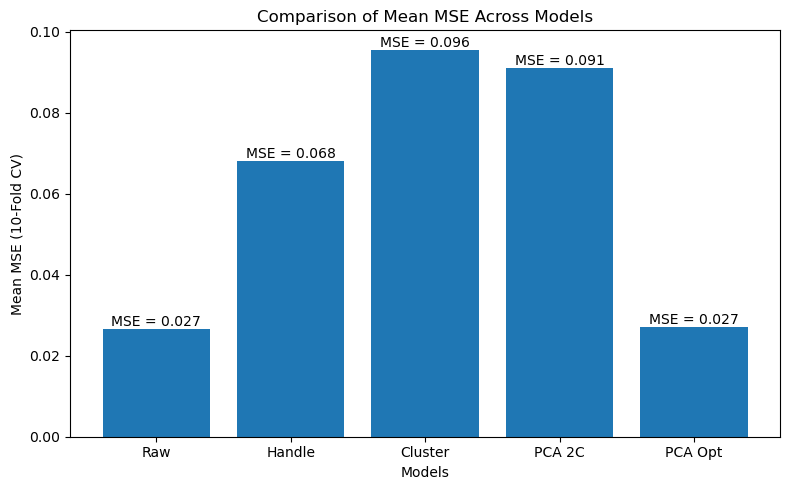

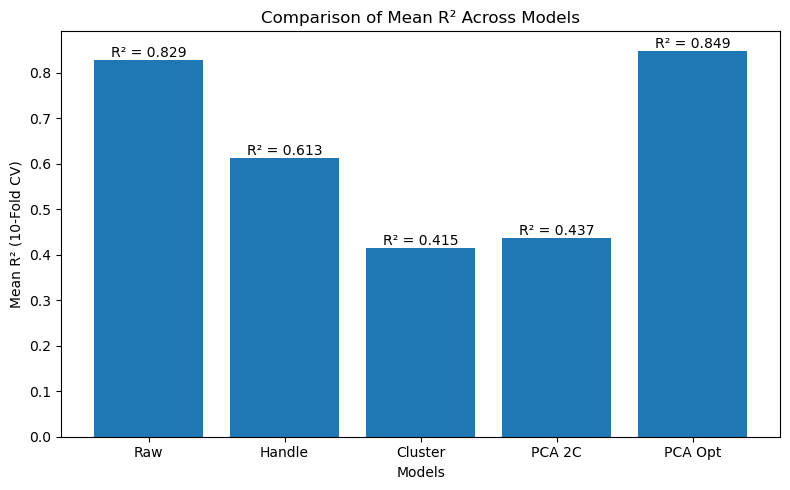

In [8]:
model_names = ["Raw", "Handle", "Cluster", "PCA 2C", "PCA Opt"]
mean_mses = [mean_raw_mse, mean_handle_mse, mean_cluster_mse, mean_pca_mse, mean_pca_opt_mse]
mean_r2s  = [mean_raw_r2,  mean_handle_r2,  mean_cluster_r2,  mean_pca_r2, mean_pca_opt_r2]

# --- Bar chart for MSE ---
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mean_mses)
plt.xlabel("Models")
plt.ylabel("Mean MSE (10-Fold CV)")
plt.title("Comparison of Mean MSE Across Models")

# Add numerical value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'MSE = {height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- Bar chart for R² ---
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mean_r2s)
plt.xlabel("Models")
plt.ylabel("Mean R² (10-Fold CV)")
plt.title("Comparison of Mean R² Across Models")

# Add numerical value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'R² = {height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 4.2 T-test

In [ ]:
# # Identify Best Model and Paired t-test vs. Baseline (Raw)
# # Decide your primary metric for "best"; let's assume we pick the model
# # with the lowest mean MSE as "best."
# mean_mses_array = np.array(mean_mses)
# best_idx = mean_mses_array.argmin()
# best_model_name = model_names[best_idx]
# print(f"\nBest model (lowest mean CV MSE): {best_model_name} with MSE={mean_mses[best_idx]:.4f}")

In [10]:
# # If the best is not Raw, do a paired t-test of fold-wise MSE vs. Raw's fold-wise MSE
# if best_model_name != "Raw":
#     # Gather the fold-wise MSE arrays for baseline (Raw) vs. best model
#     baseline_mses = raw_mses
#     if best_model_name == "Handle":
#         best_mses = handle_mses
#     elif best_model_name == "Cluster":
#         best_mses = cluster_mses
#     else:
#         best_mses = pca_mses
    
#     # Paired t-test
#     t_stat, p_value = ttest_rel(baseline_mses, best_mses)
#     print("\nPaired t-test comparing best model vs. Raw (fold-wise MSE):")
#     print("t-statistic:", t_stat)
#     print("p-value:    ", p_value)
    
#     if p_value < 0.05:
#         print("=> The difference is statistically significant at the 5% level.")
#     else:
#         print("=> The difference is not statistically significant at the 5% level.")
# else:
#     print("\nBest model is the Raw model, so no t-test needed.")

In [11]:
# # 8. Retrain the best model on the FULL train set, Evaluate on X_test
# if best_model_name == "Raw":
#     X_full = X_train_raw
#     y_full = y_train_raw
#     X_test_final = X_test_raw
#     y_test_final = y_test_raw
# elif best_model_name == "Handle":
#     X_full = X_train_handle
#     y_full = y_train_handle
#     X_test_final = X_test_handle
#     y_test_final = y_test_handle
# elif best_model_name == "Cluster":
#     X_full = X_train_cluster
#     y_full = y_train_cluster
#     X_test_final = X_test_cluster
#     y_test_final = y_test_cluster
# else:
#     X_full = X_train_pca
#     y_full = y_train_pca
#     X_test_final = X_test_pca
#     y_test_final = y_test_pca

# final_model = MLPRegressor(hidden_layer_sizes=(64, 64),
#                            activation='relu',
#                            solver='adam',
#                            max_iter=500,
#                            random_state=0)
# final_model.fit(X_full, y_full)

# y_test_pred = final_model.predict(X_test_final)

# test_mse = mean_squared_error(y_test_final, y_test_pred)
# test_r2  = r2_score(y_test_final, y_test_pred)

# print(f"\nFinal Test Results ({best_model_name} model):")
# print(f"Test MSE =  {test_mse:.4f}")
# print(f"Test R^2  =  {test_r2:.4f}")